In [2]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import numpy as np
import time
import datetime
from graph_utils import *

In [2]:
df_prox_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="proximity_rituals")
df_rqi_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="rqi_rituals")
df_coalitions_rituals = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="coalitions_rituals")
df_ritual_details = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="ritual_details")
df_ritual_details = df_ritual_details[df_ritual_details['dyad'].notna()]
df_census_fl = pd.read_excel('../rstb20190422_si_004.xlsx', sheet_name="censusFL")

/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/khoaly/opt/anaconda3/envs/monke/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed

In [27]:
prox_df = df_prox_rituals[df_prox_rituals["SRI"] != 0]
prox_df.ritualcount.value_counts() == df_prox_rituals.ritualcount.value_counts()


prox_g = nx.Graph()
node_colors = []
for i in prox_df.index:
    m1 = prox_df.loc[i, 'm1']
    m2 = prox_df.loc[i, 'm2']
    prox_g.add_edge(m1, m2, weight=prox_df.loc[i, 'SRI'])

None


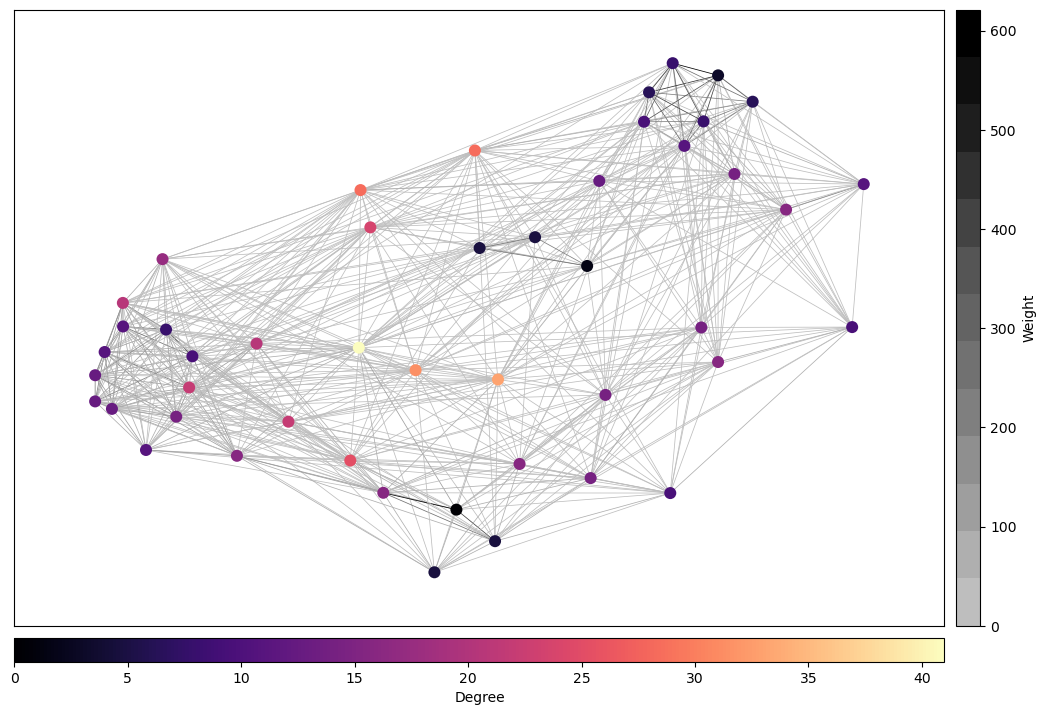

In [30]:
name = "g_g_29"
graph = nx.read_weighted_edgelist(name)
# graph = prox_g

edges, weights = zip(*nx.get_edge_attributes(graph, "weight").items())
nodes, degrees = zip(*graph.degree())

node_degrees = dict(zip(nodes, degrees))

min_deg = min(degrees)
max_deg = max(degrees)

min_weight = min(weights)
max_weight = max(weights)


edge_cmap_matrix = plt.cm.Greys(np.linspace(0,1,20)) # Getting color map as a matrix of colors to reinterpolate
edge_cmap = cl.ListedColormap(edge_cmap_matrix[7:])

node_cmap = plt.cm.magma

edge_norm = cl.Normalize(vmin=0, vmax=max_weight)
node_norm = cl.Normalize(vmin=0,vmax=max_deg)

val_map = {node : degree / max_deg for node, degree in node_degrees.items()}
values = [val_map.get(node) for node in nodes]

node_options = {"node_color": values, "node_size": 75, "linewidths": 0, "cmap": node_cmap}
edge_options = {"width": 0.55, "edge_color": weights, "edge_cmap": edge_cmap}
pos = nx.spring_layout(graph, seed=13)  # Seed for reproducible layout

fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

edge_ax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
node_ax = fig.add_axes([ax.get_position().y0+0.015, ax.get_position().x0-0.06, ax.get_position().width, 0.03])

edge_clbr = mpl.colorbar.ColorbarBase(edge_ax, label="Weight", norm=edge_norm, cmap=edge_cmap)
node_clbr = mpl.colorbar.ColorbarBase(node_ax, orientation="horizontal", norm=node_norm, cmap=node_cmap, label="Degree")

nodes = nx.draw_networkx_nodes(graph, pos, **node_options, ax=ax)
edges = nx.draw_networkx_edges(graph, pos, **edge_options, ax=ax)

print(plt.savefig(f"./imgs/{name}.png", dpi=500, bbox_inches='tight'))
plt.show()

None


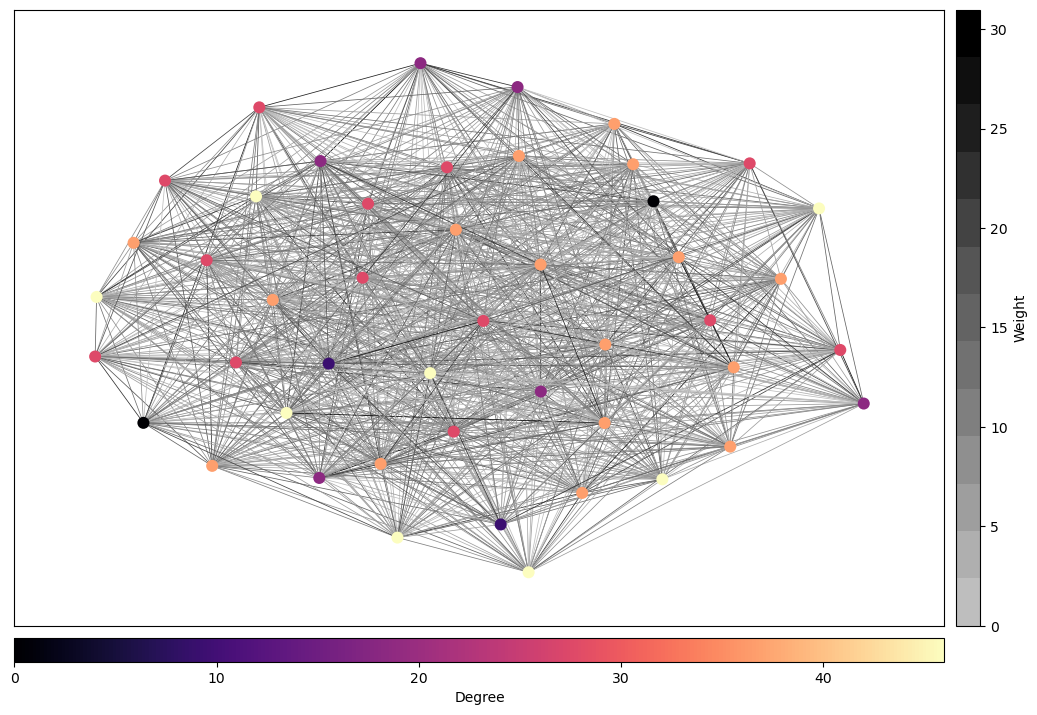